In [52]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [53]:
# For time stamps
from datetime import datetime


In [54]:
# For division
from __future__ import division

In [55]:
# For reading stock data from yahoo
# from pandas.io.data import DataReader


from pandas_datareader import data, wb
import pandas_datareader.data as web


In [56]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']


In [57]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


In [58]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] =web.DataReader(stock,'yahoo',start,end)


In [59]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,252.413889,246.708033,249.191547,249.805793,3.361219e+07,248.284440
std,43.799249,42.491058,42.967051,43.412787,1.719258e+07,43.841644
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,209.667496,207.040001,208.460007,208.722504,2.188935e+07,206.290520
50%,255.899994,245.330002,248.239998,248.494995,2.857305e+07,247.059525
75%,287.262512,280.434998,282.972496,285.677498,3.877955e+07,284.906265
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [60]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-05-20 to 2020-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


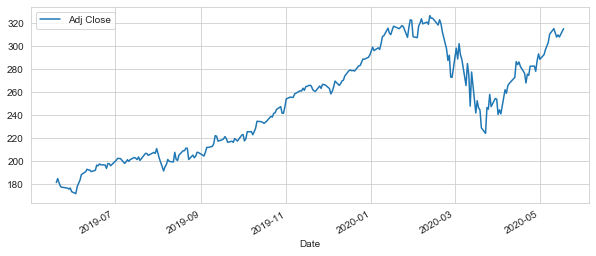

In [61]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

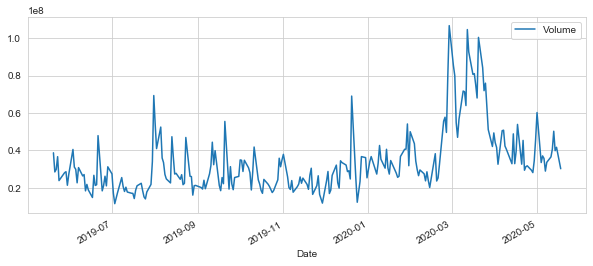

In [62]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [63]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    #AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

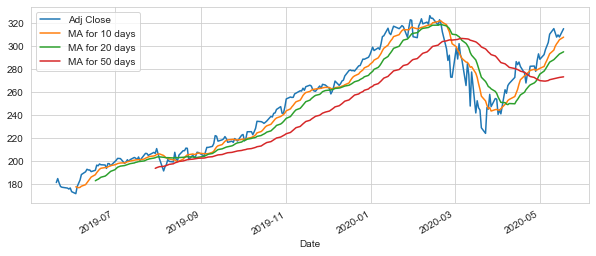

In [64]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

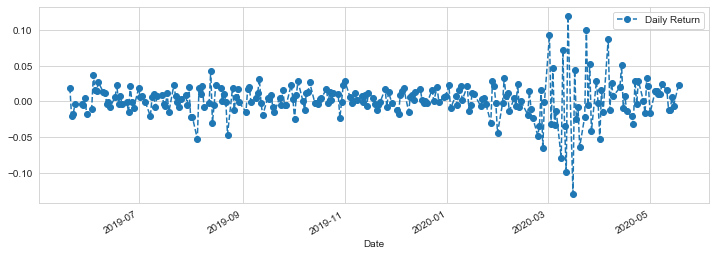

In [65]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

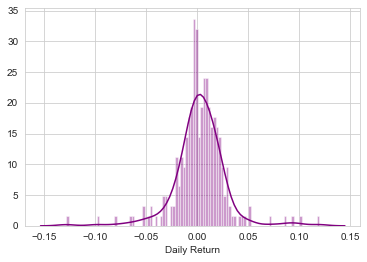

In [66]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()
